In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

## data

### 변수

id: 날짜와 시간별 id  
hour: 시간  
temperature: 기온  
precipitation: 비가 오지 않았으면 0, 비가 오면 1  
windspeed: 풍속(평균)  
humidity: 습도  
visibility: 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)  
ozone: 오존  
pm10: 미세먼지(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)  
pm2.5: 미세먼지(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)  
count: 시간에 따른 따릉이 대여 수

hour_bef_temperature, hour_bef_precipitation, hour_bef_windspeedhour_bef_humidity, hour_bef_visibility, hour_bef_ozone, hour_bef_pm10, hour_bef_pm2.5 이런 식으로 1시간 전의 기록들로 이루어져 있음

In [41]:
train=pd.read_csv("C:/Users/phl02/Desktop/P/Dacon-practice/따릉이/data/train.csv")
test=pd.read_csv("C:/Users/phl02/Desktop/P/Dacon-practice/따릉이/data/test.csv")
submission=pd.read_csv('C:/Users/phl02/Desktop/P/Dacon-practice/따릉이/data/submission.csv')

시간별 자전거 대여량의 평균

In [6]:
train[['hour','count']].groupby('hour').mean()

,count
hour,
0,71.766667
1,47.606557
2,31.409836
3,21.377049
4,13.524590
5,13.114754
6,24.557377
7,62.360656
8,136.688525


### 시각화

Text(3, 200, 'go to work')

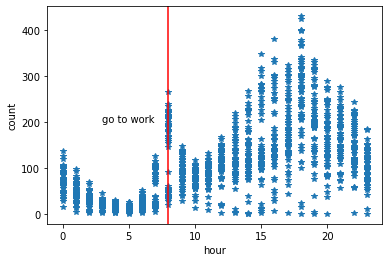

In [19]:
plt.plot('hour', 'count', '*', data = train)
plt.xlabel('hour')
plt.ylabel('count')
plt.axvline(8, color = 'red')
plt.text(3, 200, 'go to work', fontsize = 10)

Text(3, 200, 'go to work')

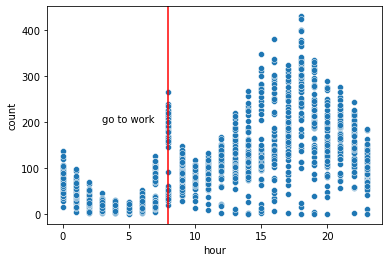

In [23]:
sns.scatterplot(x='hour',y='count',data=train)
plt.xlabel('hour')
plt.ylabel('count')
plt.axvline(8, color = 'red')
plt.text(3, 200, 'go to work', fontsize = 10)

Text(0, 0.5, 'temperature')

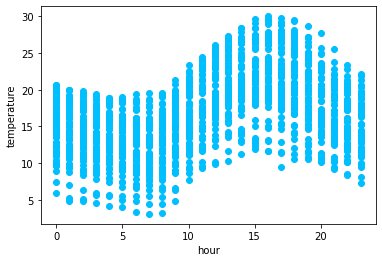

In [54]:
plt.plot('hour', 'hour_bef_temperature', 'o', data = train,color='deepskyblue')
plt.xlabel('hour')
plt.ylabel('temperature')

Text(0, 0.5, 'precipitation')

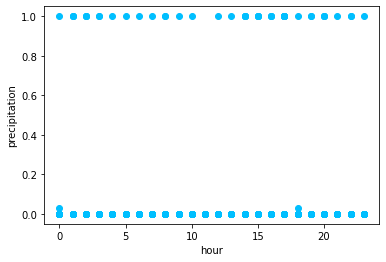

In [66]:
plt.plot('hour', 'hour_bef_precipitation',  'o',data = train,color='deepskyblue')
plt.xlabel('hour')
plt.ylabel('precipitation')

Text(0, 0.5, 'windspeed')

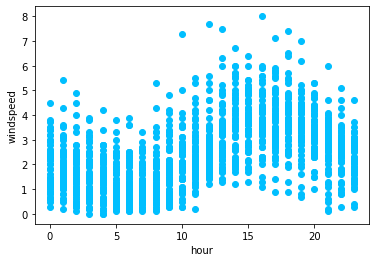

In [68]:
plt.plot('hour', 'hour_bef_windspeed', 'o', data = train,color='deepskyblue')
plt.xlabel('hour')
plt.ylabel('windspeed')

Text(0, 0.5, 'humidity')

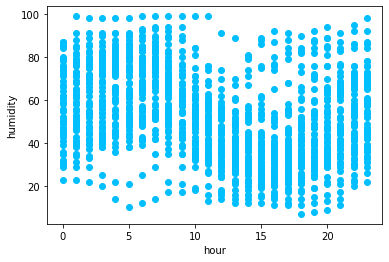

In [69]:
plt.plot('hour', 'hour_bef_humidity', 'o', data = train,color='deepskyblue')
plt.xlabel('hour')
plt.ylabel('humidity')

Text(0, 0.5, 'visibility')

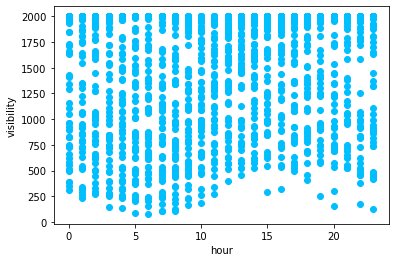

In [70]:
plt.plot('hour', 'hour_bef_visibility', 'o', data = train,color='deepskyblue')
plt.xlabel('hour')
plt.ylabel('visibility')

Text(0, 0.5, 'ozone')

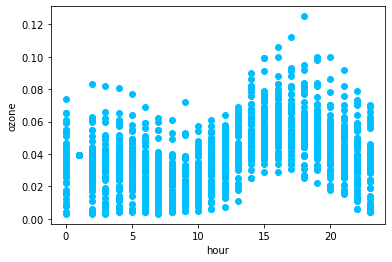

In [71]:
plt.plot('hour', 'hour_bef_ozone', 'o', data = train,color='deepskyblue')
plt.xlabel('hour')
plt.ylabel('ozone')

Text(0, 0.5, 'pm10')

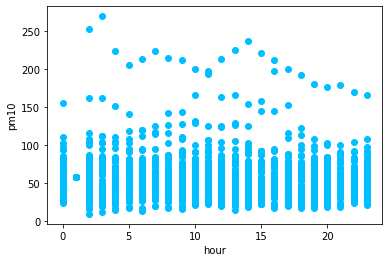

In [72]:
plt.plot('hour', 'hour_bef_pm10', 'o', data = train,color='deepskyblue')
plt.xlabel('hour')
plt.ylabel('pm10')

Text(0, 0.5, 'pm2.5')

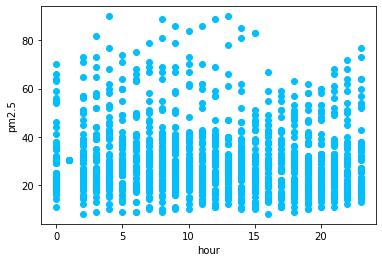

In [73]:
plt.plot('hour', 'hour_bef_pm2.5', 'o', data = train,color='deepskyblue')
plt.xlabel('hour')
plt.ylabel('pm2.5')

Text(0, 0.5, 'count & visibility')

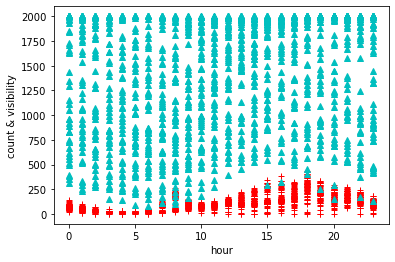

In [17]:
plt.plot('hour', 'count', 'r+', data = train)
plt.plot('hour', 'hour_bef_visibility', 'c^', data = train)
plt.xlabel('hour')
plt.ylabel('count & visibility')

<AxesSubplot:>

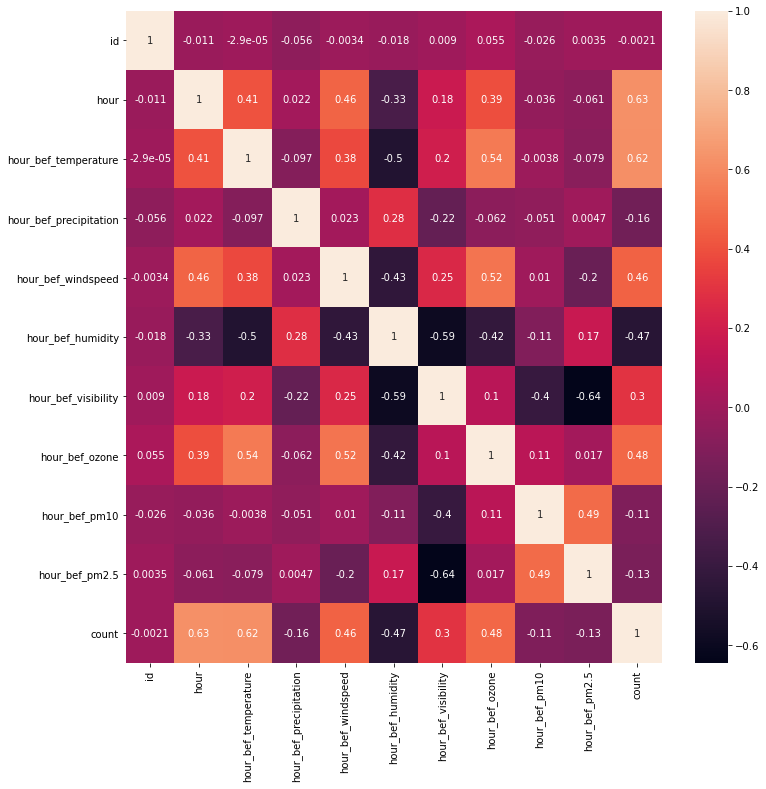

In [24]:
plt.figure(figsize = (12, 12))
sns.heatmap(train.corr(), annot = True)

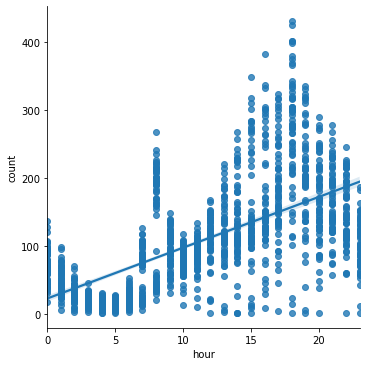

In [25]:
sns.lmplot(x = 'hour', y = 'count', data = train)

<AxesSubplot:ylabel='Frequency'>

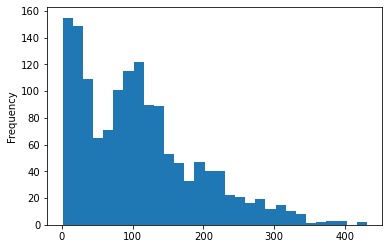

In [26]:
train['count'].plot(kind = 'hist', bins = 30)

<AxesSubplot:xlabel='count', ylabel='Density'>

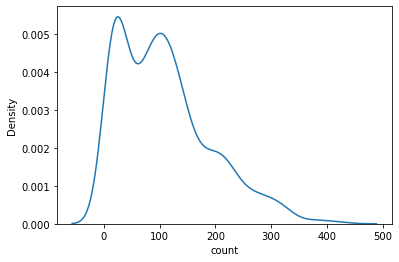

In [27]:
sns.kdeplot(train['count'])

<AxesSubplot:xlabel='hour', ylabel='hour_bef_humidity'>

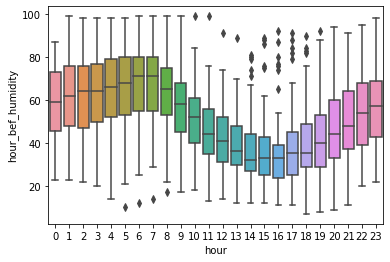

In [28]:
sns.boxplot(x = 'hour', y = 'hour_bef_humidity', data = train)

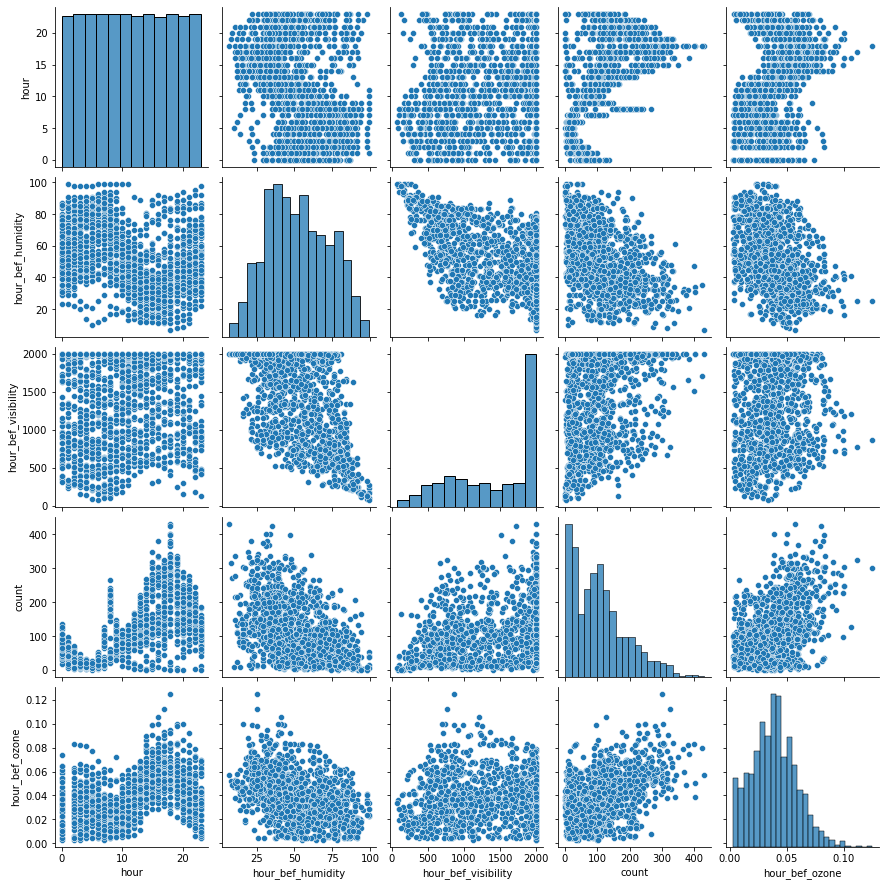

In [29]:
sns.pairplot(train[['hour', 'hour_bef_humidity', 'hour_bef_visibility', 'count', 'hour_bef_ozone']])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


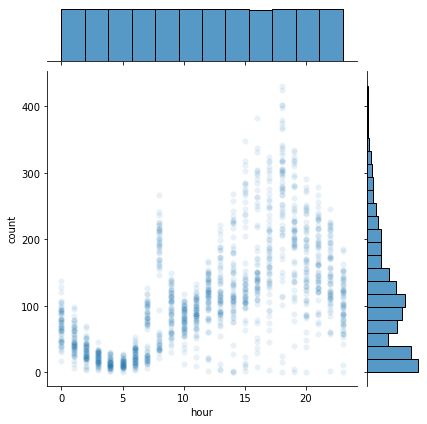

In [30]:
sns.jointplot('hour', 'count', data = train, alpha = 0.1)

In [31]:
train[train['hour'] > 12]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0
7,16,21,16.0,0.0,6.0,21.0,1961.0,0.050,90.0,28.0,146.0
...,...,...,...,...,...,...,...,...,...,...,...
1448,2168,19,10.6,0.0,0.8,84.0,1091.0,0.033,23.0,22.0,114.0
1450,2170,15,23.1,0.0,4.3,23.0,1798.0,0.064,54.0,29.0,266.0
1453,2173,18,24.8,0.0,3.6,33.0,1262.0,0.084,113.0,49.0,303.0
1457,2178,21,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0,216.0


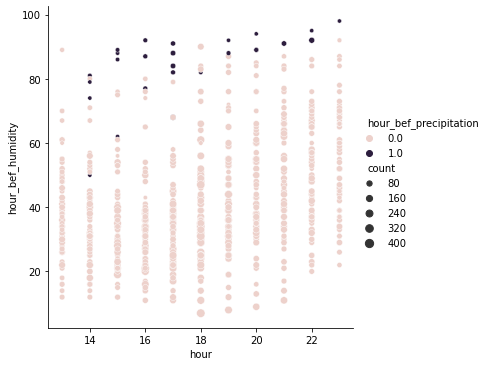

In [32]:
sns.relplot(x = 'hour', y = 'hour_bef_humidity', hue = 'hour_bef_precipitation', size = 'count', data = train[train['hour'] > 12])

## 전처리

In [40]:
def fill_bicycle_na(df, column) :
    df[column] = df[column].fillna(value = df[column].mean())

In [42]:
train_na_sum = train.isnull().sum()

In [46]:
na_columns=train_na_sum[train_na_sum != 0].index

In [47]:
for col in na_columns:
    
    fill_bicycle_na(train, col)
    
    print(col, '결측값 대체 완료')

hour_bef_temperature 결측값 대체 완료
hour_bef_precipitation 결측값 대체 완료
hour_bef_windspeed 결측값 대체 완료
hour_bef_humidity 결측값 대체 완료
hour_bef_visibility 결측값 대체 완료
hour_bef_ozone 결측값 대체 완료
hour_bef_pm10 결측값 대체 완료
hour_bef_pm2.5 결측값 대체 완료


In [48]:
test_isna_sum = test.isna().sum()

In [49]:
test_na_columns = test_isna_sum[test_isna_sum != 0].index

In [51]:
for col in test_na_columns:
    fill_bicycle_na(test, col)
    print(col, '대체 완료')

hour_bef_temperature 대체 완료
hour_bef_precipitation 대체 완료
hour_bef_windspeed 대체 완료
hour_bef_humidity 대체 완료
hour_bef_visibility 대체 완료
hour_bef_ozone 대체 완료
hour_bef_pm10 대체 완료
hour_bef_pm2.5 대체 완료


## 변수 선택&모델

### KNN 모형

In [75]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [76]:
model = KNeighborsRegressor(n_jobs = -1)

In [77]:
column = ['hour', 'hour_bef_temperature']
X_train = train[column]
y_train = train['count']
X_test = test[column]

In [78]:
model_5 = KNeighborsRegressor(n_jobs = -1, n_neighbors = 5)
model_7 = KNeighborsRegressor(n_jobs = -1, n_neighbors = 7)
model_9 = KNeighborsRegressor(n_jobs = -1, n_neighbors = 9)

In [79]:
kfold = KFold(n_splits = 5, shuffle = True, random_state = 10)

In [80]:
np.mean(cross_val_score(model_5, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error'))

-2154.4346238290263

In [81]:
np.mean(cross_val_score(model_7, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error'))

-2059.3699019701085

In [82]:
np.mean(cross_val_score(model_9, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error'))

-1993.3584133742238

In [83]:
model_9.fit(X_train, y_train)

KNeighborsRegressor(n_jobs=-1, n_neighbors=9)

In [84]:
submission['count'] = model_9.predict(X_test)
submission.to_csv('knn_9.csv', index = False)

In [85]:
model.fit(X_train, y_train)

KNeighborsRegressor(n_jobs=-1)

In [86]:
submission['count'] = model.predict(X_test)
submission.to_csv('knn_5.csv', index = False)

### 랜덤 포레스트 모형

In [87]:
model = RandomForestRegressor()

In [88]:
X_train = train.drop(['id', 'count'], axis = 1)
y_train = train['count']
X_test = test.drop('id', axis = 1)

In [89]:
from sklearn.model_selection import GridSearchCV

In [90]:
param = {'min_samples_split': [30, 50, 70],
        'max_depth': [5, 6, 7],
        'n_estimators': [50, 150, 250]}

In [91]:
gs = GridSearchCV(estimator=model, param_grid=param, scoring = 'neg_mean_squared_error', cv = 3)

In [92]:
gs.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 6, 7],
                         'min_samples_split': [30, 50, 70],
                         'n_estimators': [50, 150, 250]},
             scoring='neg_mean_squared_error')

In [93]:
submission['count'] = gs.predict(X_test)
submission.to_csv('gridsearch.csv', index = False)

In [94]:
from sklearn.model_selection import RandomizedSearchCV

In [95]:
param = {'min_samples_split': range(30, 70),
        'max_depth': [5, 6, 7],
        'n_estimators': range(50, 250)}

In [96]:
rs = RandomizedSearchCV(estimator=model, param_distributions=param, n_iter = 30, random_state=0, scoring = 'neg_mean_squared_error', n_jobs = -1)

In [97]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(), n_iter=30, n_jobs=-1,
                   param_distributions={'max_depth': [5, 6, 7],
                                        'min_samples_split': range(30, 70),
                                        'n_estimators': range(50, 250)},
                   random_state=0, scoring='neg_mean_squared_error')

In [98]:
submission['count'] = rs.predict(X_test)
submission.to_csv('randomsearch.csv', index = False)

In [99]:
model.fit(X_train, y_train)

RandomForestRegressor()

In [101]:
submission['count'] = model.predict(X_test)
submission.to_csv('rf_default.csv', index = False)

In [102]:
model_100 = RandomForestRegressor(n_estimators=100, n_jobs = -1, random_state=10)
model_200 = RandomForestRegressor(n_estimators=200, n_jobs = -1, random_state=10)
model_300 = RandomForestRegressor(n_estimators=300, n_jobs = -1, random_state=10)
model_500 = RandomForestRegressor(n_estimators=500, n_jobs = -1, random_state=10)

<AxesSubplot:xlabel='n_estimators'>

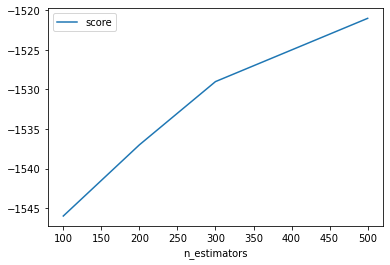

In [103]:
pd.DataFrame({'n_estimators':[100, 200, 300, 500], 'score':[-1546, -1537, -1529, -1521]}).plot('n_estimators', 'score')

In [104]:
model_sam_30 = RandomForestRegressor(n_estimators=500, n_jobs = -1, random_state=10, min_samples_split=30)
model_sam_50 = RandomForestRegressor(n_estimators=500, n_jobs = -1, random_state=10, min_samples_split=50)
model_sam_100 = RandomForestRegressor(n_estimators=500, n_jobs = -1, random_state=10, min_samples_split=100)

In [105]:
final_model = RandomForestRegressor(n_estimators=500, n_jobs = -1, random_state=10, min_samples_split=30)

In [106]:
final_model.fit(X_train, y_train)

RandomForestRegressor(min_samples_split=30, n_estimators=500, n_jobs=-1,
                      random_state=10)

In [107]:
submission['count'] = final_model.predict(X_test)
submission.to_csv('estimators_500_samples_30.csv', index = False)